<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Radiation_Analysis(Best_Updated_with_deviation3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-71e33fe93b12>:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()
<ipython-input-2-71e33fe93b12>:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()


Standard Deviation of the Differences Between the Two Files Column-wise:
Radiation_GHI           29.234366
Radiation_GII           43.235858
Radiation_GHI_Acc        0.149939
Radiation_GII_Acc        0.208779
Wind_Speed               0.018435
Wind_Direction         109.927591
Humidity                 3.797537
Ambient_Temperature      0.278361
Module_Temperature       1.289801
Rain                     0.000000
Diffuse_Radiation      114.698079
Today_Rain               0.082772
dtype: float64 



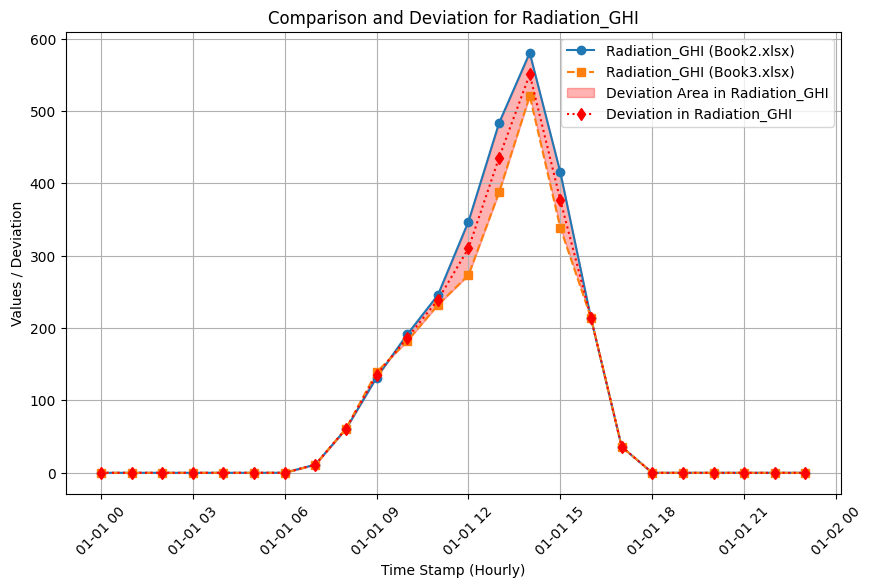

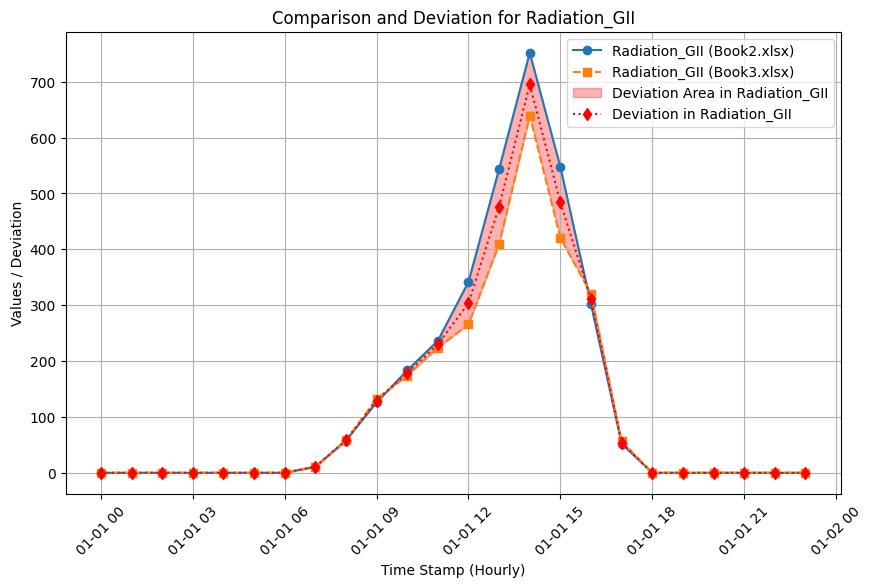

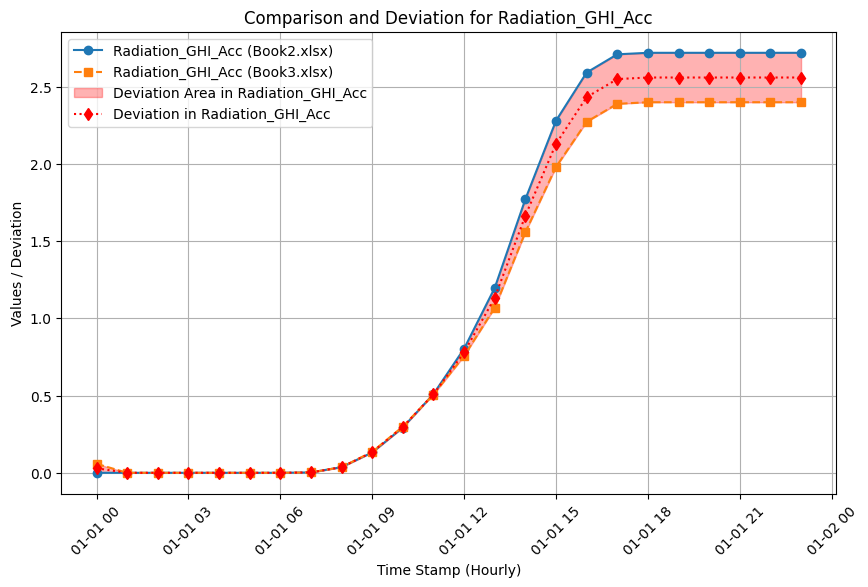

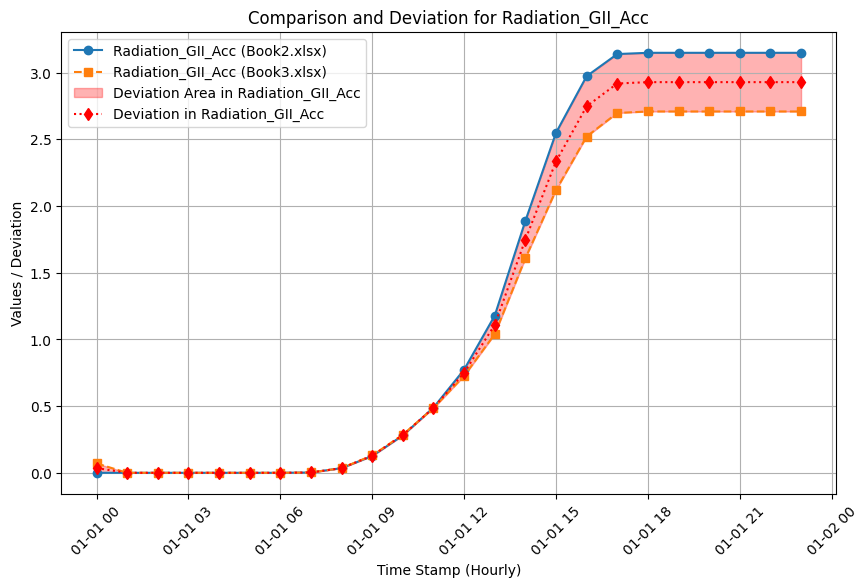

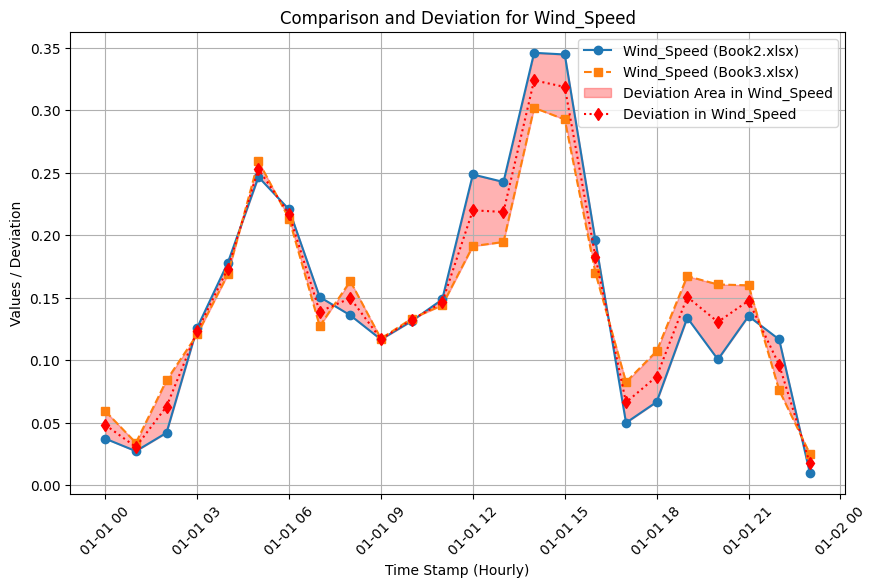

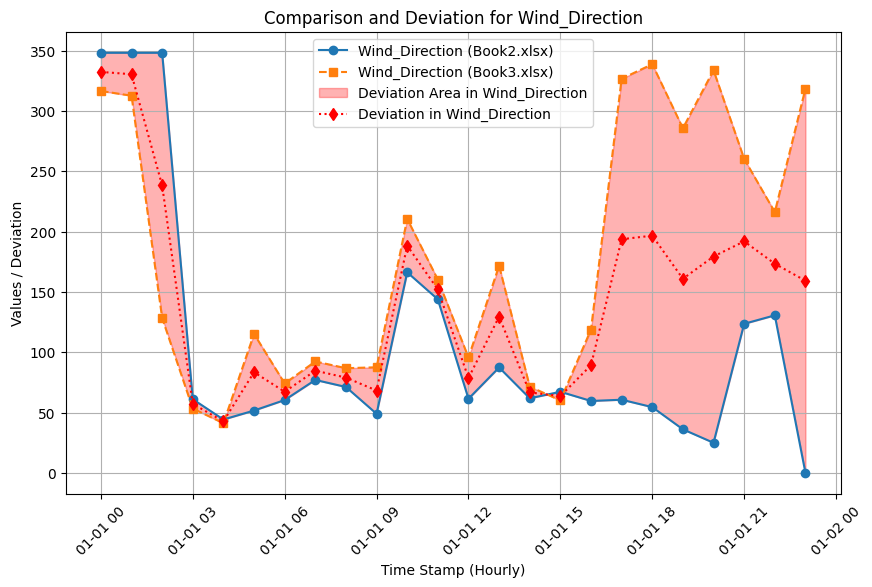

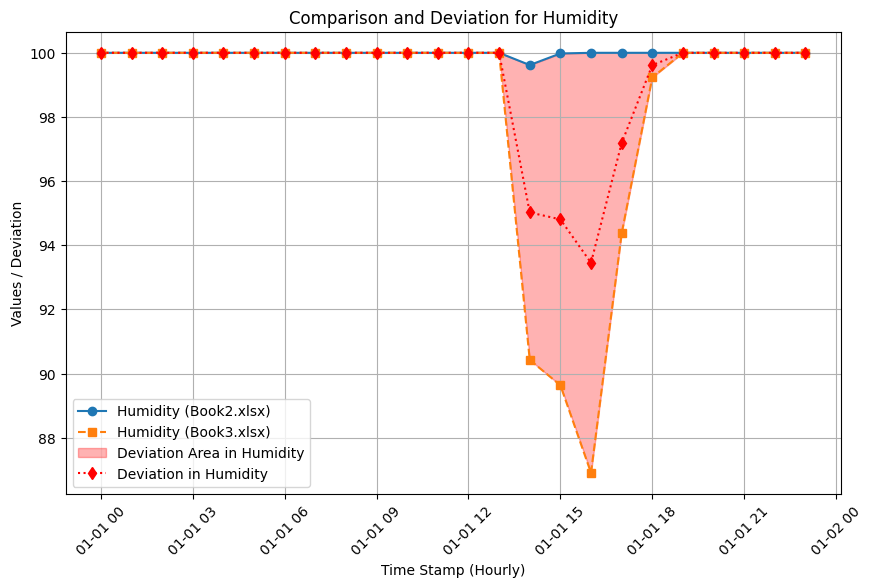

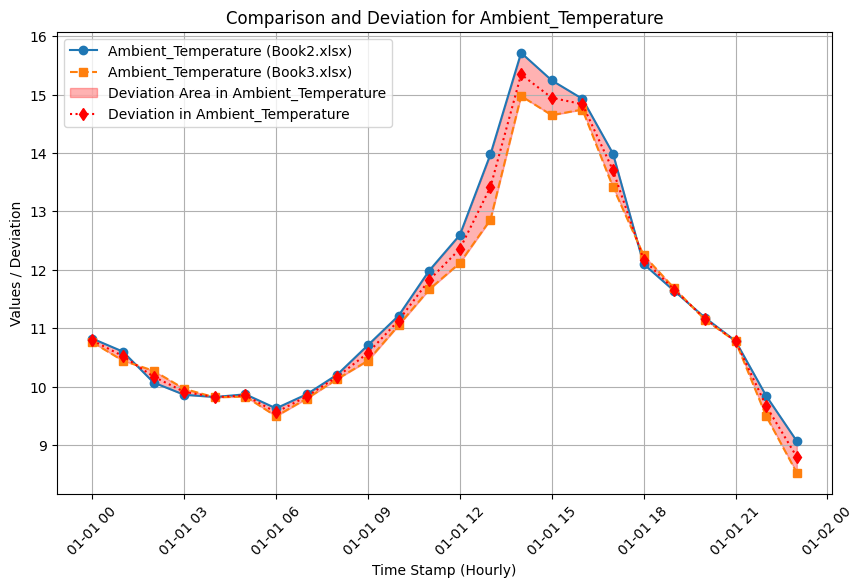

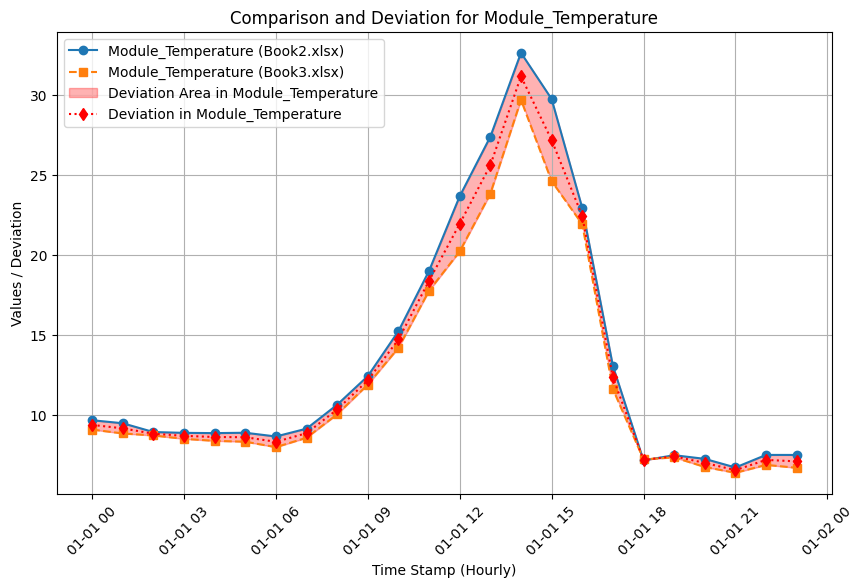

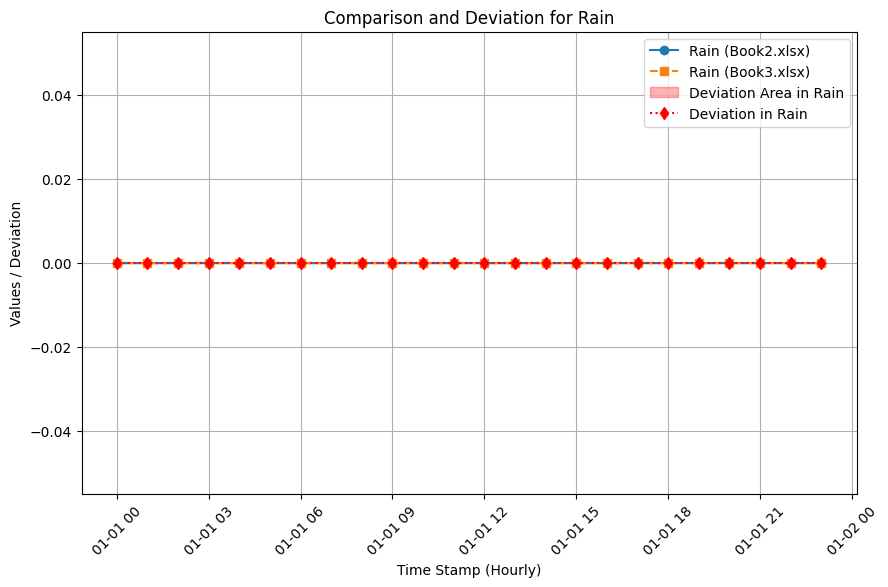

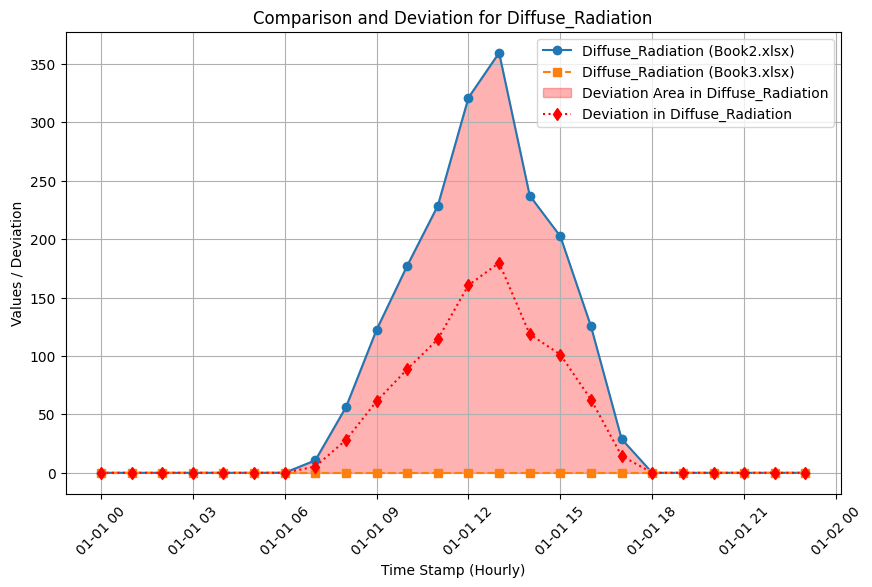

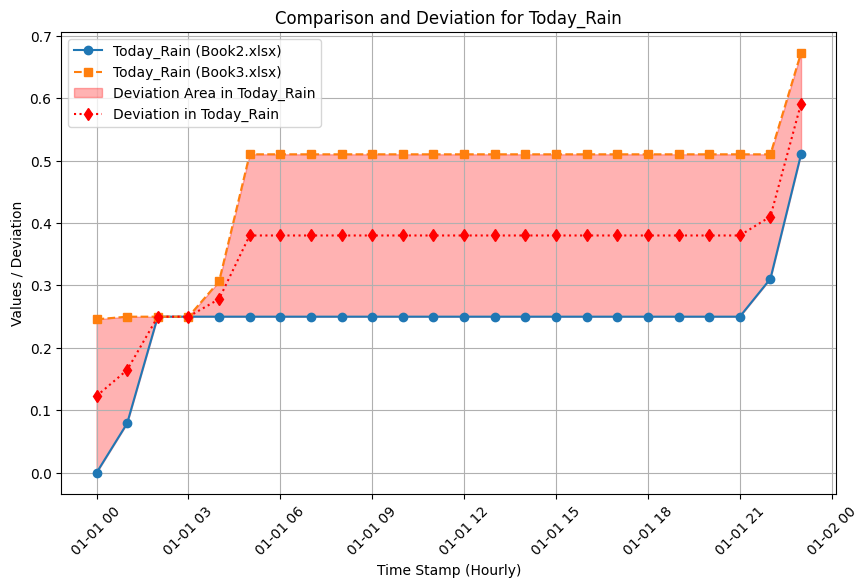

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def process_file(file_path):
    # Load the Excel file, skipping the first row (units)
    df = pd.read_excel(file_path, skiprows=1)

    # Standardize column names by stripping spaces and newlines
    df.columns = [
        "Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
        "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
        "Ambient_Temperature", "Module_Temperature", "Rain",
        "Diffuse_Radiation", "Today_Rain"
    ]

    # Convert Time_Stamp to datetime
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

    # Convert numeric columns
    numeric_columns = df.columns[1:]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Drop missing values and duplicates
    df = df.dropna(subset=["Time_Stamp"]).drop_duplicates(subset=["Time_Stamp"])

    # Set Time_Stamp as index for resampling
    df.set_index("Time_Stamp", inplace=True)

    # Resample data to hourly intervals (mean values per hour)
    df_resampled = df.resample("H").mean()

    return df_resampled

# File paths
file_path_1 = "Book2.xlsx"
file_path_2 = "Book3.xlsx"

# Process both files
df_resampled_1 = process_file(file_path_1)
df_resampled_2 = process_file(file_path_2)

# Ensure both datasets have the same time index
df_resampled_1, df_resampled_2 = df_resampled_1.align(df_resampled_2, join="inner")

# Get common columns
common_columns = df_resampled_1.columns.intersection(df_resampled_2.columns)

# Fill NaN values with 0
df_resampled_1.fillna(0, inplace=True)
df_resampled_2.fillna(0, inplace=True)

# Calculate deviation
df_deviation = abs(df_resampled_1[common_columns] - df_resampled_2[common_columns])

# Compute standard deviation of deviations
std_dev_between_graphs = df_deviation.std()

# Print standard deviation results
print("Standard Deviation of the Differences Between the Two Files Column-wise:")
print(std_dev_between_graphs, "\n")

# Plot original graphs + deviation as shaded area with deviation line
for col in common_columns:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot first dataset
    ax.plot(df_resampled_1.index, df_resampled_1[col], marker='o', linestyle="-", label=f"{col} (Book2.xlsx)")
    ax.plot(df_resampled_2.index, df_resampled_2[col], marker='s', linestyle="--", label=f"{col} (Book3.xlsx)")

    # Compute center line for deviation
    mean_line = (df_resampled_1[col] + df_resampled_2[col]) / 2

    # Fill area between Book2 and Book3 data to represent deviation
    ax.fill_between(df_resampled_1.index, df_resampled_1[col], df_resampled_2[col], color='red', alpha=0.3, label=f"Deviation Area in {col}")

    # Plot deviation centered within Book2 and Book3 curves
    ax.plot(df_deviation.index, mean_line, marker='d', linestyle=":", color="red", label=f"Deviation in {col}")

    # Adding titles and labels
    ax.set_xlabel("Time Stamp (Hourly)")
    ax.set_ylabel("Values / Deviation")
    ax.set_title(f"Comparison and Deviation for {col}")
    ax.legend()
    ax.grid(True)

    plt.xticks(rotation=45)
    plt.show()